## Mastodon stats

Using public API calls to fetch basic stats for a single Mastodon instance.

Public API calls do not require authentication, which means they are easy to use when just playing around.

https://docs.joinmastodon.org/client/public/

In [1]:
import requests
import json

In [2]:
instance_url = "https://sigmoid.social"

## Public timeline

In [3]:
url = f"{instance_url}/api/v1/timelines/public"
print(url)
response = requests.get(url)
statuses = json.loads(response.text)

https://sigmoid.social/api/v1/timelines/public


In [4]:
statuses[0]

{'id': '109422933319930506',
 'created_at': '2022-11-28T18:50:57.000Z',
 'in_reply_to_id': None,
 'in_reply_to_account_id': None,
 'sensitive': False,
 'spoiler_text': '',
 'visibility': 'public',
 'language': 'en',
 'uri': 'https://mas.to/users/olimould/statuses/109422933275980909',
 'url': 'https://mas.to/@olimould/109422933275980909',
 'replies_count': 0,
 'reblogs_count': 0,
 'favourites_count': 0,
 'edited_at': None,
 'content': '<p>Post app founders thinking net worth is a function of the intersectional politics of marginality is pretty on point for social media in 2022.</p>',
 'reblog': None,
 'account': {'id': '109301374396688445',
  'username': 'olimould',
  'acct': 'olimould@mas.to',
  'display_name': 'Oli Mould',
  'locked': False,
  'bot': False,
  'discoverable': True,
  'group': False,
  'created_at': '2022-11-07T00:00:00.000Z',
  'note': '<p>Academic at large, but lectures in human geography at Royal Holloway, University of London. </p><p>Researches anti-capitalism &amp;

## Profile data

In [5]:
account = "florian"
url = f"{instance_url}/api/v1/accounts/lookup?acct={account}"
print(url)
respone = requests.get(url)
data = json.loads(response.text)
print(data)


https://sigmoid.social/api/v1/accounts/lookup?acct=florian
[{'id': '109422933319930506', 'created_at': '2022-11-28T18:50:57.000Z', 'in_reply_to_id': None, 'in_reply_to_account_id': None, 'sensitive': False, 'spoiler_text': '', 'visibility': 'public', 'language': 'en', 'uri': 'https://mas.to/users/olimould/statuses/109422933275980909', 'url': 'https://mas.to/@olimould/109422933275980909', 'replies_count': 0, 'reblogs_count': 0, 'favourites_count': 0, 'edited_at': None, 'content': '<p>Post app founders thinking net worth is a function of the intersectional politics of marginality is pretty on point for social media in 2022.</p>', 'reblog': None, 'account': {'id': '109301374396688445', 'username': 'olimould', 'acct': 'olimould@mas.to', 'display_name': 'Oli Mould', 'locked': False, 'bot': False, 'discoverable': True, 'group': False, 'created_at': '2022-11-07T00:00:00.000Z', 'note': '<p>Academic at large, but lectures in human geography at Royal Holloway, University of London. </p><p>Resear

In [12]:
# NO IDEA why this doesn't find the account, while simply using the url in a browser works just fine

class AccountNotFoundError(Exception):
    pass

def get_account_id(account: str, instance_url: str):
    account = "florian"
    url = f"{instance_url}/api/v1/accounts/lookup?acct={account}"
    print(url)
    respone = requests.get(url)
    data = json.loads(response.text)
    
    
    if not response.ok:
        print(data.get("error"))
        return None
    
    if not len(data):
        raise AccountNotFoundError
    
    account = data[0]    
    return account["id"]


account_id = get_account_id("florian", instance_url)
print(account_id)

# Manual lookup of my account id:
# account_id = "109296602840311251"

https://sigmoid.social/api/v1/accounts/lookup?acct=florian
109422933319930506


In [8]:




# url=f"{instance_url}/api/v1/accounts/{account_id}"
# print(url)
# response = requests.get(url)
# profile = json.loads(response.text)

In [10]:
# profile

## View profile directory



In [13]:
def profile_directory():
    url=f"{instance_url}/api/v1/directory"
    print(url)
    # TODO: add loop to paginate through the directory and fetch ALL profiles (with sleep in between)
    response = requests.get(url, {"local": True})
    data = json.loads(response.text)
    return data

profiles = profile_directory()

https://sigmoid.social/api/v1/directory


In [14]:
len(profiles)

40

In [15]:
profiles

[{'id': '109309441664410020',
  'username': 'rajammanabrolu',
  'acct': 'rajammanabrolu',
  'display_name': 'Prithviraj (Raj) Ammanabrolu',
  'locked': False,
  'bot': False,
  'discoverable': True,
  'group': False,
  'created_at': '2022-11-08T00:00:00.000Z',
  'note': '<p>On faculty market! Interactive and Grounded AI. NLP+RL at AllenAI. PhD from Georgia Tech. he/him<br /><a href="http://prithvirajva.com" target="_blank" rel="nofollow noopener noreferrer"><span class="invisible">http://</span><span class="">prithvirajva.com</span><span class="invisible"></span></a></p>',
  'url': 'https://sigmoid.social/@rajammanabrolu',
  'avatar': 'https://cdn.masto.host/sigmoidsocial/accounts/avatars/109/309/441/664/410/020/original/828f86bc4bd5da2f.jpeg',
  'avatar_static': 'https://cdn.masto.host/sigmoidsocial/accounts/avatars/109/309/441/664/410/020/original/828f86bc4bd5da2f.jpeg',
  'header': 'https://cdn.masto.host/sigmoidsocial/accounts/headers/109/309/441/664/410/020/original/0d4282a76659ce

In [42]:
!pip install pandas

  Using cached https://files.pythonhosted.org/packages/b5/ac/5ec0601ce698235cad8559dfe0ae5ace903a359d617a8c4c033f9879faf8/pandas-1.1.5-cp37-cp37m-macosx_10_9_x86_64.whl
    100% |████████████████████████████████| 501kB 17.0MB/s ta 0:00:01
    100% |████████████████████████████████| 16.9MB 1.1MB/s ta 0:00:011
You are using pip version 10.0.1, however version 22.3.1 is available.
You should consider upgrading via the 'pip install --upgrade pip' command.


In [47]:
!pip install matplotlib

    100% |████████████████████████████████| 7.3MB 5.1MB/s eta 0:00:01
  Using cached https://files.pythonhosted.org/packages/5c/f9/695d6bedebd747e5eb0fe8fad57b72fdf25411273a39791cde838d5a8f51/cycler-0.11.0-py3-none-any.whl
    100% |████████████████████████████████| 3.3MB 6.4MB/s eta 0:00:01
    100% |████████████████████████████████| 71kB 20.2MB/s ta 0:00:01
    100% |████████████████████████████████| 972kB 9.5MB/s eta 0:00:01
You are using pip version 10.0.1, however version 22.3.1 is available.
You should consider upgrading via the 'pip install --upgrade pip' command.


In [43]:
import pandas as pd

In [44]:
profiles[0]

{'id': '109296524293727022',
 'username': 'jmlipman',
 'acct': 'jmlipman',
 'display_name': 'J. Miguel Valverde :verified:',
 'locked': False,
 'bot': False,
 'discoverable': True,
 'group': False,
 'created_at': '2022-11-06T00:00:00.000Z',
 'note': '<p>Postdoc at UEF. My research involves deep learning and medical image segmentation. <a href="https://sigmoid.social/tags/MedicalAI" class="mention hashtag" rel="tag">#<span>MedicalAI</span></a> <a href="https://sigmoid.social/tags/MedicalImaging" class="mention hashtag" rel="tag">#<span>MedicalImaging</span></a></p>',
 'url': 'https://sigmoid.social/@jmlipman',
 'avatar': 'https://cdn.masto.host/sigmoidsocial/accounts/avatars/109/296/524/293/727/022/original/866dbd55b1d0ba6b.jpg',
 'avatar_static': 'https://cdn.masto.host/sigmoidsocial/accounts/avatars/109/296/524/293/727/022/original/866dbd55b1d0ba6b.jpg',
 'header': 'https://sigmoid.social/headers/original/missing.png',
 'header_static': 'https://sigmoid.social/headers/original/missing

In [45]:
df = pd.DataFrame(profiles)
df

,id,username,acct,display_name,locked,bot,discoverable,group,created_at,note,...,avatar_static,header,header_static,followers_count,following_count,statuses_count,last_status_at,noindex,emojis,fields
0,109296524293727022,jmlipman,jmlipman,J. Miguel Valverde :verified:,False,False,True,False,2022-11-06T00:00:00.000Z,<p>Postdoc at UEF. My research involves deep l...,...,https://cdn.masto.host/sigmoidsocial/accounts/...,https://sigmoid.social/headers/original/missin...,https://sigmoid.social/headers/original/missin...,80,99,39,2022-11-20,False,"[{'shortcode': 'verified', 'url': 'https://cdn...","[{'name': 'location', 'value': 'Kuopio, Finlan..."
1,109287245374058739,mrdrozdov,mrdrozdov,Andrew Drozdov,False,False,True,False,2022-11-04T00:00:00.000Z,"<p>PhD student at UMass Amherst. Prev: Google,...",...,https://cdn.masto.host/sigmoidsocial/accounts/...,https://cdn.masto.host/sigmoidsocial/accounts/...,https://cdn.masto.host/sigmoidsocial/accounts/...,203,324,271,2022-11-20,False,[],"[{'name': 'personal site', 'value': '<a href=""..."
2,109344330885935122,anglerond,anglerond,Domininque Mariko,False,False,True,False,2022-11-14T00:00:00.000Z,,...,https://cdn.masto.host/sigmoidsocial/accounts/...,https://sigmoid.social/headers/original/missin...,https://sigmoid.social/headers/original/missin...,6,78,2,2022-11-20,False,[],[]
3,109288522604558266,Riedl,Riedl,Mark Riedl,False,False,True,False,2022-11-05T00:00:00.000Z,"<p>AI for storytelling, games, explainability,...",...,https://cdn.masto.host/sigmoidsocial/accounts/...,https://cdn.masto.host/sigmoidsocial/accounts/...,https://cdn.masto.host/sigmoidsocial/accounts/...,3951,354,377,2022-11-20,False,[],"[{'name': 'Lab website', 'value': '<a href=""ht..."
4,109287971635033538,jasmijn,jasmijn,Jasmijn Bastings,False,False,True,False,2022-11-04T00:00:00.000Z,"<p>Senior Research Scientist, Google Brain, Am...",...,https://cdn.masto.host/sigmoidsocial/accounts/...,https://cdn.masto.host/sigmoidsocial/accounts/...,https://cdn.masto.host/sigmoidsocial/accounts/...,239,151,10,2022-11-20,False,[],[]
5,109289110822048466,cjmuise,cjmuise,Christian Muise,False,False,True,False,2022-11-05T00:00:00.000Z,<p>Assistant Professor @ Queen&#39;s Universit...,...,https://cdn.masto.host/sigmoidsocial/accounts/...,https://cdn.masto.host/sigmoidsocial/accounts/...,https://cdn.masto.host/sigmoidsocial/accounts/...,115,155,83,2022-11-20,False,[],"[{'name': 'Lab', 'value': '<a href=""https://mu..."
6,109314940273318590,stablehorde,stablehorde,Stable Horde,False,False,True,False,2022-11-09T00:00:00.000Z,"<p>Free, Crowdsourced, Distributed Stable Diff...",...,https://cdn.masto.host/sigmoidsocial/accounts/...,https://cdn.masto.host/sigmoidsocial/accounts/...,https://cdn.masto.host/sigmoidsocial/accounts/...,76,11,69,2022-11-20,False,[],"[{'name': 'homepage', 'value': '<a href=""https..."
7,109291659184972478,Andrewkemendo,Andrewkemendo,Andrew Kemendo,False,False,True,False,2022-11-05T00:00:00.000Z,<p>Applied RL &amp; CV director on sabbatical<...,...,https://cdn.masto.host/sigmoidsocial/accounts/...,https://cdn.masto.host/sigmoidsocial/accounts/...,https://cdn.masto.host/sigmoidsocial/accounts/...,58,71,138,2022-11-20,False,[],"[{'name': 'Website', 'value': 'Kemendo.com', '..."
8,109291590644076517,claforte,claforte,Christian Laforte,False,False,True,False,2022-11-05T00:00:00.000Z,"<p>At AMD, I lead a small team focused on high...",...,https://cdn.masto.host/sigmoidsocial/accounts/...,https://sigmoid.social/headers/original/missin...,https://sigmoid.social/headers/original/missin...,122,139,50,2022-11-20,False,[],[]
9,109311368221410833,f,f,Fahim Farook,False,False,True,False,2022-11-09T00:00:00.000Z,"<p>Mad coder, writer, and editor. Co-author of...",...,https://cdn.masto.host/sigmoidsocial/accounts/...,https://cdn.masto.host/sigmoidsocial/accounts/...,https://cdn.masto.host/sigmoidsocial/accounts/...,184,60,440,2022-11-20,False,[],"[{'name': 'Blog', 'value': '<a href=""https://w..."


<AxesSubplot:ylabel='Frequency'>

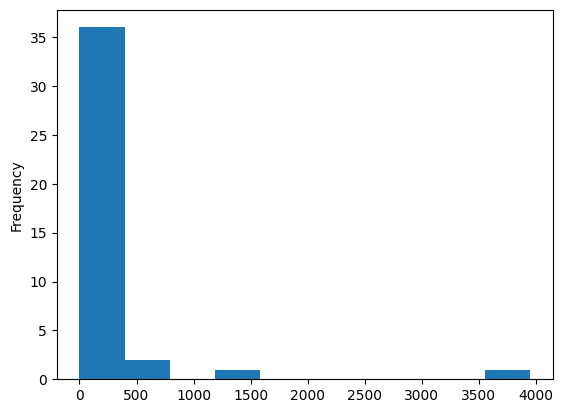

In [48]:
df.followers_count.plot.hist()

<AxesSubplot:ylabel='Frequency'>

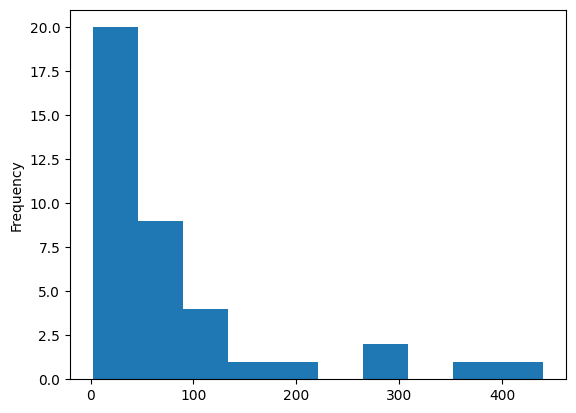

In [50]:
df[df.statuses_count>0].statuses_count.plot.hist()